# Predicion de transacciones fraudolentas en formato presencial
Prueba tecnica hecha por Juan Pablo Carmona Alvarez - carmonaalvarezjuanpablo@gmail.com

# Cargar los datos y explorar su estructura y características.

Iremos importando las dependencias requeridas para el proceso

Para cargar los datos, utilizaré la biblioteca Pandas de Python y la función read_csv() para leer los archivos train.csv y test.csv.

In [94]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Una vez cargados los datos, es importante explorar su estructura y características para comprender mejor su contenido. Utilizaré las funciones head(), describe() y info() para obtener un resumen de los datos.

In [95]:
train.describe()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,FECHA,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,...,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
count,2.965000e+03,2965.000000,2.965000e+03,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2.941000e+03,2941.000000,...,2.941000e+03,2.941000e+03,2965.000000,1418.000000,1418.000000,1418.000000,2965.000000,2508.000000,2965.000000,2965.000000
mean,6.890938e+09,0.246543,5.035695e+05,14.960877,314.656739,2.015051e+07,3.143002,13.492411,2.000920e+07,416.426386,...,1.449104e+07,8.506309e+06,1.765936,17354.692891,4144.323540,4985.442313,3.943676,196.589282,4379.826287,1765.212887
std,9.739700e+09,0.431071,9.859497e+05,6.348607,295.142673,9.134641e+00,2.092284,9.134641,9.260427e+04,290.263484,...,5.637311e+07,6.179161e+07,1.042219,25168.020649,1794.829357,2655.081718,2.750021,192.026206,1779.739070,2398.666844
min,2.364560e+06,0.000000,0.000000e+00,0.000000,1.000000,2.015050e+07,0.000000,1.000000,1.911111e+07,1.000000,...,0.000000e+00,0.000000e+00,1.000000,904.810000,904.810000,904.810000,1.000000,4.480000,0.000000,1.000000
25%,2.552997e+09,0.000000,9.016001e+04,12.000000,24.830000,2.015050e+07,1.000000,4.000000,1.995102e+07,168.000000,...,2.500000e+06,5.000000e+05,1.000000,6474.200000,3178.210000,4552.410000,2.000000,60.800000,4552.410000,139.870000
50%,6.142884e+09,0.000000,2.435912e+05,16.000000,243.620000,2.015052e+07,3.000000,15.000000,2.001123e+07,360.000000,...,5.800000e+06,1.800000e+06,1.000000,9104.820000,4552.410000,4552.410000,3.000000,127.700000,4552.410000,836.080000
75%,9.000000e+09,0.000000,5.058190e+05,20.000000,594.770000,2.015052e+07,5.000000,21.000000,2.008081e+07,659.000000,...,1.274000e+07,4.500000e+06,2.000000,21376.445000,4552.410000,4552.410000,5.000000,269.082500,4552.410000,2533.440000
max,9.330050e+10,1.000000,2.001406e+07,23.000000,1310.460000,2.015053e+07,6.000000,31.000000,2.015043e+07,967.000000,...,1.940070e+09,1.600000e+09,9.000000,758837.940000,16328.810000,17780.330000,20.000000,1217.570000,21991.200000,18832.060000


In [96]:
test.describe()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_COL,Dist_max_INTER,FECHA_FRAUDE,FECHA,DIASEM,DIAMES,...,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Sum_NAL,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL,Dist_mean_NAL,Dist_sum_INTER,Dist_mean_INTER
count,1.000000e+02,0.0,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.00000,100.000000,...,47.000000,47.000000,100.000000,79.000000,79.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,7.441491e+09,NaN,3.845816e+05,14.550000,280.947300,2108.476800,2.015051e+07,2.015051e+07,3.41000,13.060000,...,3934.249787,4484.993191,3.560000,1870.094051,178.446835,4375.002600,1477.58430,141.183000,6894.492000,1849.627400
std,3.870588e+09,NaN,5.369078e+05,6.966551,278.635222,2598.825046,8.925981e+00,8.925981e+00,1.98018,8.925981,...,1587.498578,1909.871123,2.499778,2205.128111,182.625161,2129.924287,2101.56121,177.633935,13479.580172,2250.243502
min,9.852307e+07,NaN,0.000000e+00,0.000000,1.000000,1.000000,2.015050e+07,2.015050e+07,0.00000,1.000000,...,904.810000,904.810000,1.000000,8.970000,4.480000,904.810000,1.00000,1.000000,1.000000,1.000000
25%,1.124408e+09,NaN,7.411017e+04,11.000000,10.137500,1.000000,2.015050e+07,2.015050e+07,2.00000,4.750000,...,3031.435000,3854.540000,2.000000,407.985000,45.220000,4552.410000,71.53500,10.112500,1.000000,1.000000
50%,9.666081e+09,NaN,2.100766e+05,16.000000,243.620000,1.000000,2.015051e+07,2.015051e+07,4.00000,14.500000,...,4319.790000,4552.410000,3.000000,1149.990000,100.310000,4552.410000,651.91500,65.285000,1.000000,1.000000
75%,9.839465e+09,NaN,4.918107e+05,20.000000,497.835000,4552.410000,2.015052e+07,2.015052e+07,5.00000,20.250000,...,4552.410000,4552.410000,4.250000,2586.720000,279.270000,4552.410000,2135.08750,201.852500,10404.300000,4154.602500
max,9.998668e+09,NaN,3.311907e+06,23.000000,1217.570000,10274.580000,2.015053e+07,2.015053e+07,6.00000,30.000000,...,8351.750000,10274.580000,15.000000,14434.250000,659.130000,17592.420000,14434.25000,659.130000,115833.160000,8351.750000


In [97]:
train.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,...,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.0,17,594.77,ATM_INT,20150515,US,ATM_INT,5,...,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.0,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,...,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00


In [98]:
test.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_COL,Dist_max_INTER,Canal1,FECHA_FRAUDE,COD_PAIS,CANAL,...,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Sum_NAL,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL,Dist_mean_NAL,Dist_sum_INTER,Dist_mean_INTER
0,98523068,NaN,42230.09,18,1.00,1.00,POS,20150515,US,POS,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
1,300237898,NaN,143202.65,20,614.04,7632.97,POS,20150506,US,MCI,...,6092.69,7632.97,2,1228.07,614.04,4552.41,1228.07,614.04,24370.75,6092.69
2,943273308,NaN,243591.25,2,286.84,2443.14,ATM_INT,20150517,EC,ATM_INT,...,1743.52,2443.14,7,1944.35,138.88,5083.41,1944.35,138.88,6974.09,1743.52
3,951645809,NaN,238267.40,20,1.00,1.00,ATM_INT,20150508,EC,ATM_INT,...,NaN,NaN,1,NaN,NaN,904.81,1.00,1.00,1.00,1.00
4,963797516,NaN,490403.58,13,1.00,1.00,ATM_INT,20150501,US,ATM_INT,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2965 non-null   int64  
 1   FRAUDE           2965 non-null   int64  
 2   VALOR            2965 non-null   float64
 3   HORA_AUX         2965 non-null   int64  
 4   Dist_max_NAL     2965 non-null   float64
 5   Canal1           2965 non-null   object 
 6   FECHA            2965 non-null   int64  
 7   COD_PAIS         2965 non-null   object 
 8   CANAL            2965 non-null   object 
 9   DIASEM           2965 non-null   int64  
 10  DIAMES           2965 non-null   int64  
 11  FECHA_VIN        2941 non-null   float64
 12  OFICINA_VIN      2941 non-null   float64
 13  SEXO             2910 non-null   object 
 14  SEGMENTO         2941 non-null   object 
 15  EDAD             2941 non-null   float64
 16  INGRESOS         2941 non-null   float64
 17  EGRESOS       

Esto me permitirá obtener una idea inicial de las variables y su distribución, así como de la presencia de valores faltantes o valores atípicos.

In [100]:
train.isnull().sum()

id                    0
FRAUDE                0
VALOR                 0
HORA_AUX              0
Dist_max_NAL          0
Canal1                0
FECHA                 0
COD_PAIS              0
CANAL                 0
DIASEM                0
DIAMES                0
FECHA_VIN            24
OFICINA_VIN          24
SEXO                 55
SEGMENTO             24
EDAD                 24
INGRESOS             24
EGRESOS              24
NROPAISES             0
Dist_Sum_INTER     1547
Dist_Mean_INTER    1547
Dist_Max_INTER     1547
NROCIUDADES           0
Dist_Mean_NAL       457
Dist_HOY              0
Dist_sum_NAL          0
dtype: int64

# Analisis exploratio de datos

Empezamos observando la distribución de la variable objetivo, es decir, la cantidad de transacciones que son fraude y las que no. Podemos utilizar un histograma para visualizar esto en el conjunto de entrenamiento. Además, podemos calcular la proporción de transacciones fraudulentas respecto al total.

0    0.753457
1    0.246543
Name: FRAUDE, dtype: float64


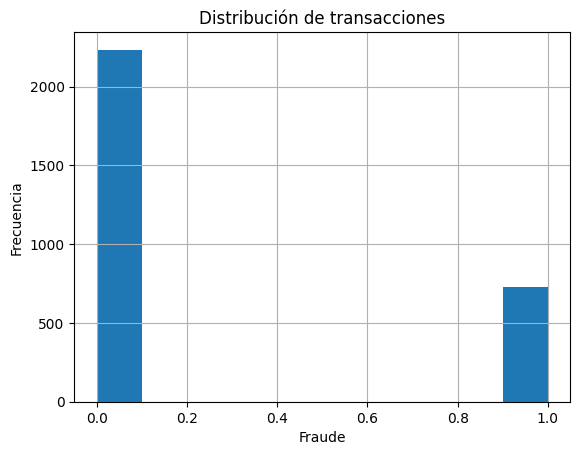

In [101]:
#Importamos matplotlib para los graficos
import matplotlib.pyplot as plt

fraud_prop = train['FRAUDE'].value_counts(normalize=True)
print(fraud_prop)

train['FRAUDE'].hist()
plt.title('Distribución de transacciones')
plt.xlabel('Fraude')
plt.ylabel('Frecuencia')
plt.show()

A continuación, podemos explorar la relación entre la variable objetivo y las variables numéricas del conjunto de datos. Podemos utilizar gráficos de caja para comparar la distribución de estas variables entre las transacciones que son fraude y las que no lo son.

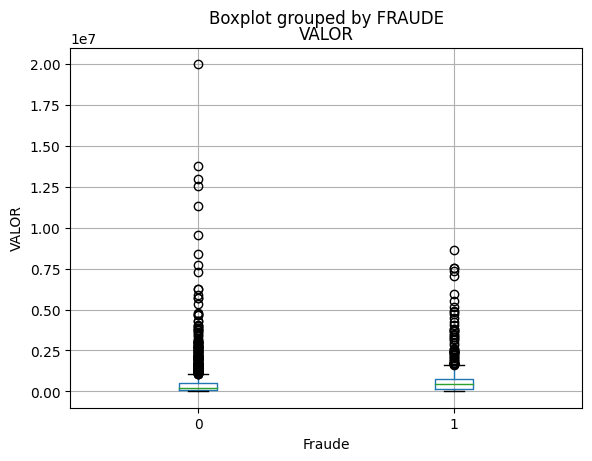

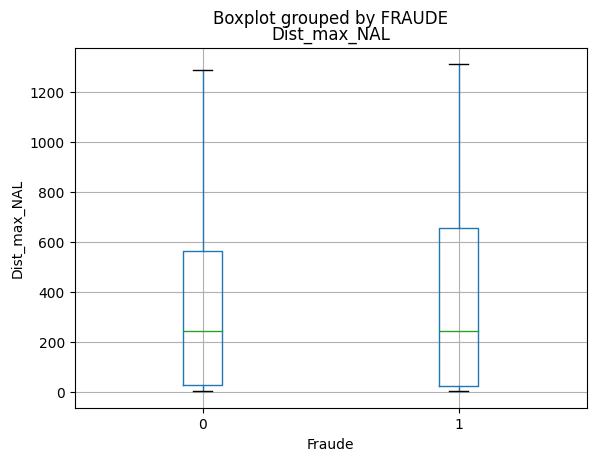

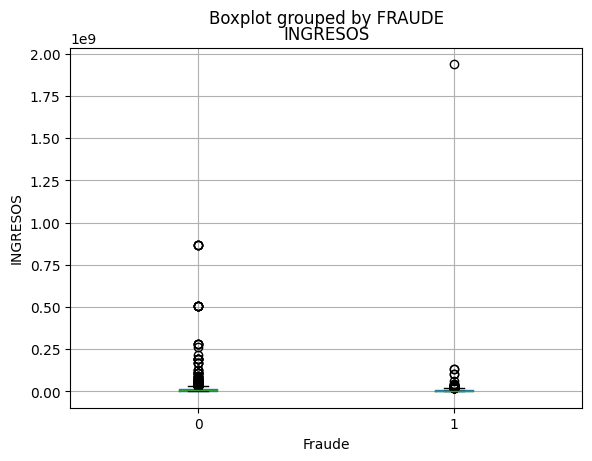

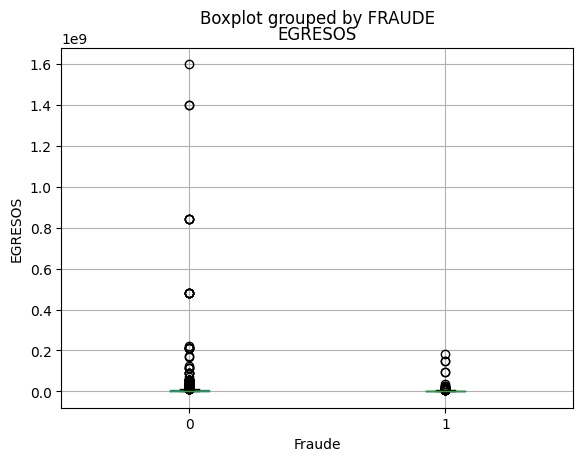

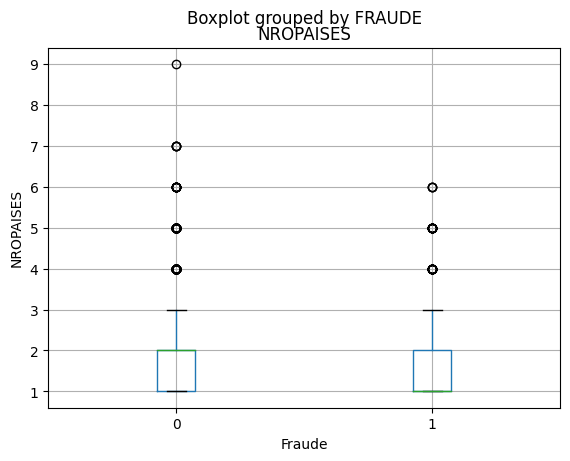

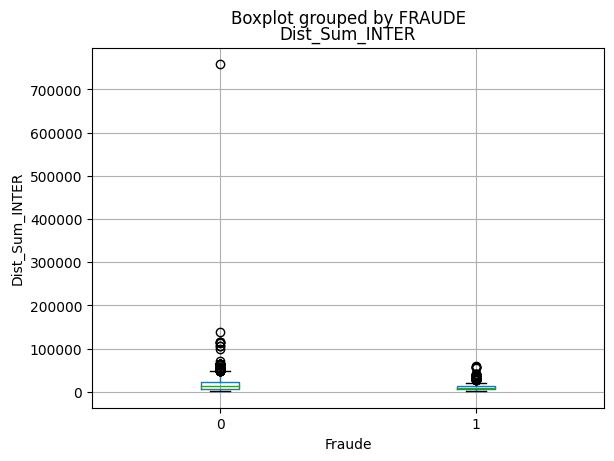

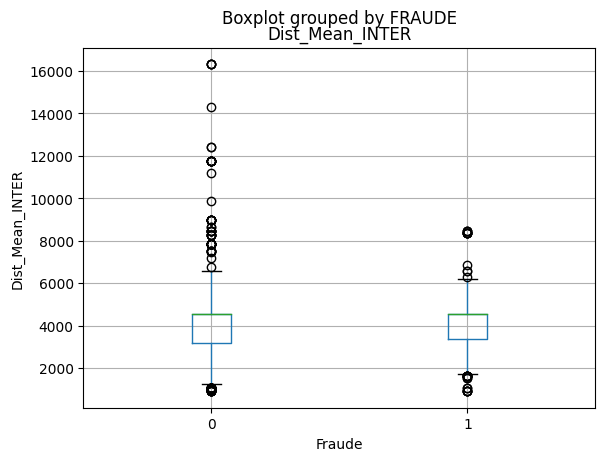

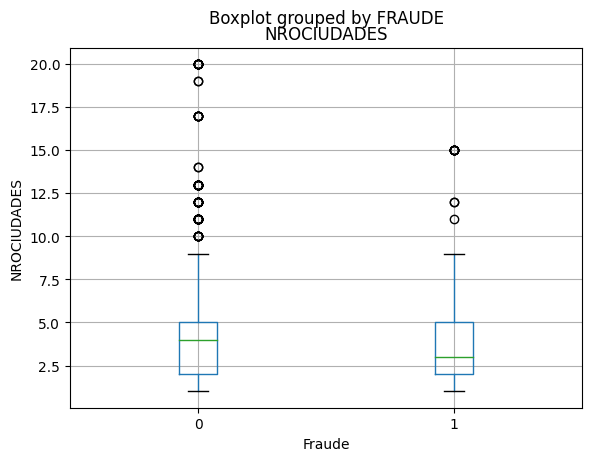

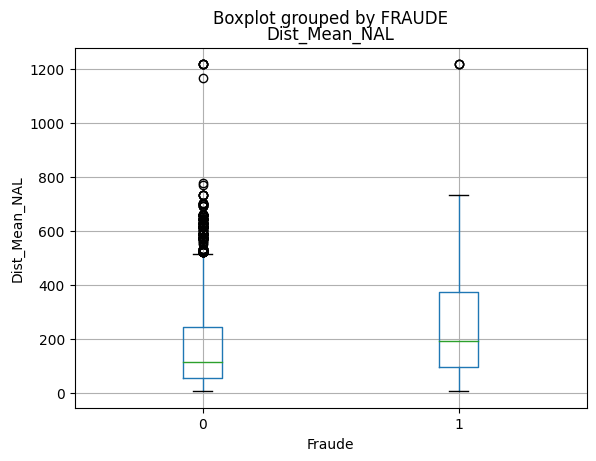

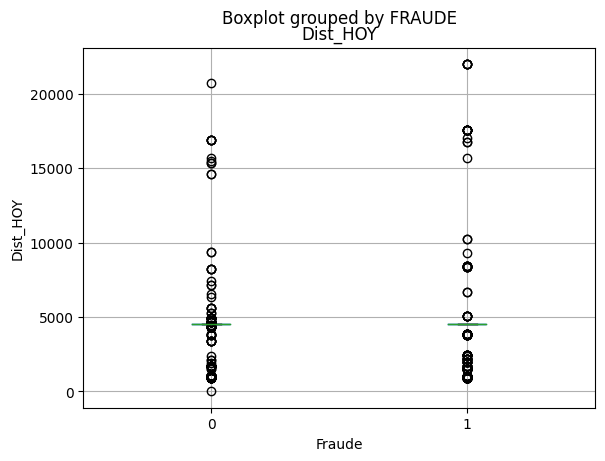

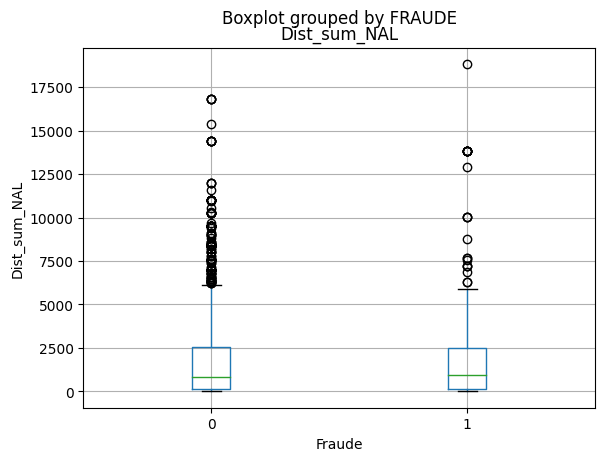

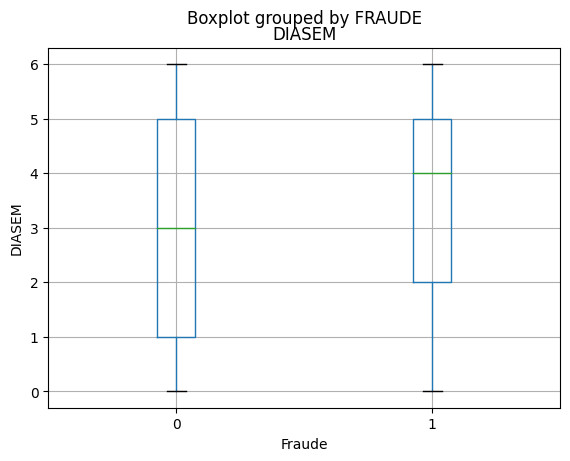

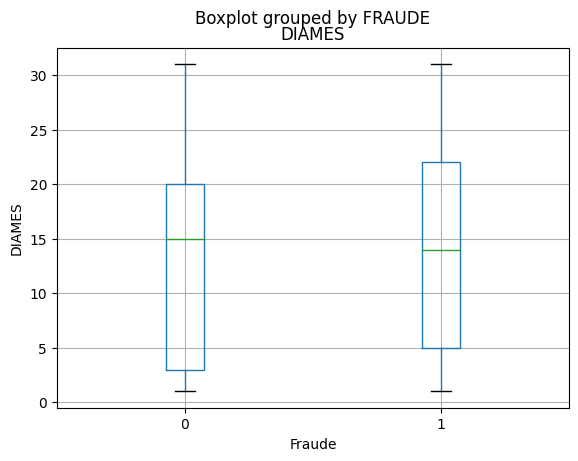

In [102]:
variables_numericas = ['VALOR', 'Dist_max_NAL', 'INGRESOS', 'EGRESOS', 'NROPAISES', 'Dist_Sum_INTER', 'Dist_Mean_INTER', 'NROCIUDADES', 'Dist_Mean_NAL', 'Dist_HOY', 'Dist_sum_NAL', 'DIASEM', 'DIAMES']

for var in variables_numericas:
    train.boxplot(column=var, by='FRAUDE')
    plt.title(var)
    plt.xlabel('Fraude')
    plt.ylabel(var)
    plt.show()

Este código generará gráficos de caja de cada variable numérica en el conjunto de entrenamiento, divididos por si la transacción es fraude o no.

En la columna 'Dist_max_NAL', se observa que la altura de la vela correspondiente a las transacciones de fraude es ligeramente más alta que la de las transacciones legítimas en la parte del rectángulo. Esto indica que, en promedio, las transacciones fraudulentas tienen un valor más alto que las transacciones legítimas en ese rango de valores. Sin embargo, la diferencia es bastante pequeña y es posible que no sea estadísticamente significativa.

Para determinar si las diferencias en algunos histogramas son significativas, vamos a realizar pruebas estadísticas como el test t de Student o el test de Wilcoxon-Mann-Whitney. Ambos son comúnmente utilizados para comparar dos grupos de datos y determinar si hay diferencias estadísticamente significativas entre ellos.

In [103]:

from scipy.stats import ttest_ind

# Seleccionar las dos muestras a comparar
legitimo = train[train['FRAUDE'] == 0]['Dist_max_NAL']
fraudulento = train[train['FRAUDE'] == 1]['Dist_max_NAL']

# Realizar la prueba t de Student
t, p = ttest_ind(legitimo, fraudulento)

# Imprimir los resultados
print(f"Estadístico t: {t:.4f}")
print(f"Valor p: {p:.4f}")

Estadístico t: -3.2263
Valor p: 0.0013


El resultado es un valor de p menor a 0.05 (o un nivel de significancia del 95%) indica que la diferencia es estadísticamente significativa, es decir, que la probabilidad de que los resultados sean aleatorios es muy baja.
Por lo tanto, en este caso podemos concluir que hay una diferencia significativa entre los datos de transacciones legítimas y de fraude en la columna 'Dist_Mean_NAL'.

Ahora veamos la columna 'Dist_HOY' que tiene una muy ligera diferencia en el grafico a primera vista.

In [104]:

# Seleccionar las dos muestras a comparar
legitimo = train[train['FRAUDE'] == 0]['Dist_HOY']
fraudulento = train[train['FRAUDE'] == 1]['Dist_HOY']

# Realizar la prueba t de Student
t, p = ttest_ind(legitimo, fraudulento)

# Imprimir los resultados
print(f"Estadístico t: {t:.4f}")
print(f"Valor p: {p:.4f}")

Estadístico t: 0.3840
Valor p: 0.7010


Vemos que un estadístico t de 0.3840 en la columna 'Dist_HOY' significa que la diferencia entre los datos de transacciones legítimas y fraudulentas en esta columna no es muy grande, y es posible que se deba a la aleatoriedad. El valor p de 0.7010 indica que la probabilidad de obtener una diferencia tan grande como la observada debido a la aleatoriedad es del 70.1%. En otras palabras, no hay suficiente evidencia para rechazar la hipótesis nula de que la diferencia entre los datos de transacciones legítimas y fraudulentas en la columna 'Dist_HOY' es estadísticamente insignificante.

También podemos examinar la relación entre las variables numéricas utilizando una matriz de correlación.

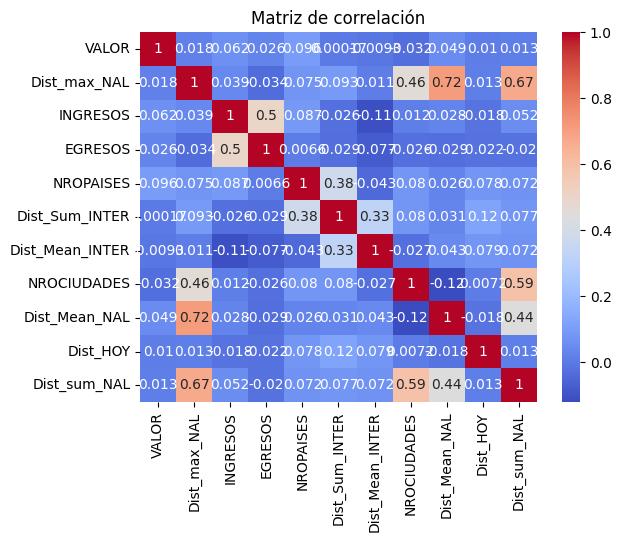

In [105]:
import seaborn as sns

#Este código imprime una matriz de correlación de las variables numéricas en el conjunto de entrenamiento.
n_v = ['VALOR', 'Dist_max_NAL', 'INGRESOS', 'EGRESOS', 'NROPAISES', 'Dist_Sum_INTER', 'Dist_Mean_INTER', 'NROCIUDADES', 'Dist_Mean_NAL', 'Dist_HOY', 'Dist_sum_NAL']

corr = train[n_v].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Matriz de correlación')
plt.show()

Podemos ver que las variables 'VALOR' y 'Dist_HOY' no tienen una correlación significativa con las otras variables, ya que todas las correlaciones son cercanas a cero o en tonos azules.

Por otro lado, la variable 'Dist_max_NAL' muestra una correlación positiva moderada con 'Dist_sum_NAL', 'Dist_Mean_NAL', y 'NROCIUDADES', lo cual indica que a medida que aumenta 'Dist_max_NAL', también lo hacen estas otras variables.

La variable 'INGRESOS' tiene una correlación positiva moderada con 'EGRESOS', lo cual indica que hay una relación entre estos dos indicadores financieros.

La variable 'EGRESOS' tiene una correlación positiva moderada con 'INGRESOS', lo cual es esperado ya que ambos indicadores financieros están relacionados entre sí.

La variable 'NROPAISES' tiene una correlación positiva moderada con 'Dist_Mean_INTER' y 'Dist_Sum_INTER', lo cual sugiere que los clientes que realizan transacciones internacionales tienden a hacerlo con más frecuencia en una mayor cantidad de países.

La variable 'Dist_Sum_INTER' tiene una correlación moderada positiva con 'Dist_Mean_INTER', lo que sugiere que los clientes que realizan transacciones internacionales tienden a hacerlo en una mayor cantidad de países y con un monto promedio más alto.

La variable 'Dist_Mean_INTER' tiene una correlación positiva moderada con 'Dist_Sum_INTER' y 'NROPAISES', lo que sugiere que los clientes que realizan transacciones internacionales tienden a hacerlo en una mayor cantidad de países y con un monto promedio más alto.

La variable 'NROCIUDADES' tiene una correlación moderada positiva con 'Dist_sum_NAL' y 'Dist_max_NAL', lo que sugiere que los clientes que realizan transacciones nacionales tienden a hacerlo en una mayor cantidad de ciudades y con montos máximos y totales más altos.

La variable 'Dist_Mean_NAL' tiene una correlación moderada positiva con 'Dist_sum_NAL' y 'Dist_max_NAL', lo que sugiere que los clientes que realizan transacciones nacionales tienden a hacerlo con un monto promedio más alto y con montos máximos y totales más altos.

Además, podemos explorar la distribución de las variables categóricas utilizando tablas de frecuencia y gráficos de barras.

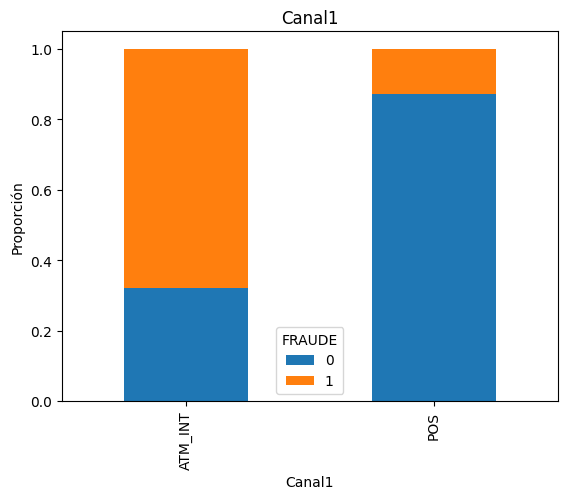

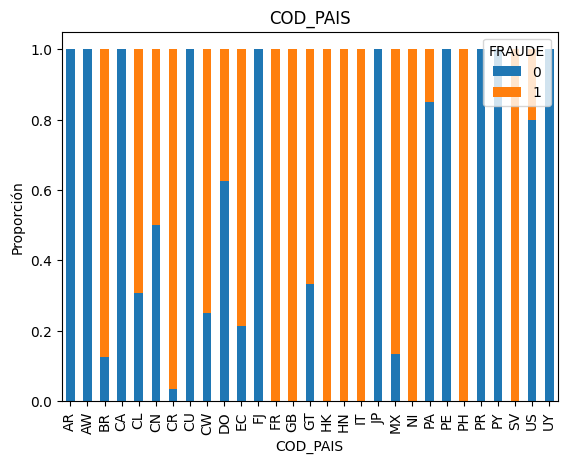

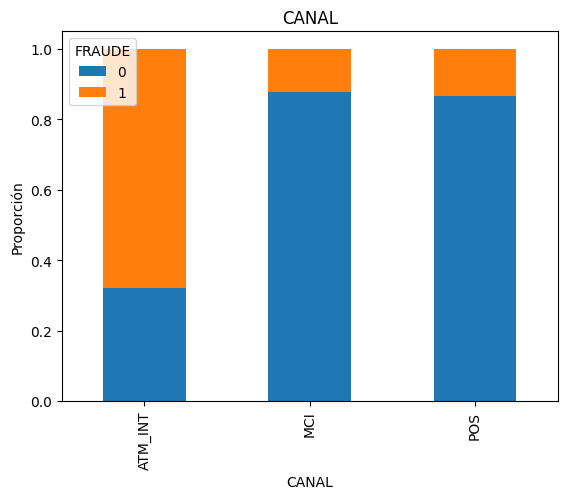

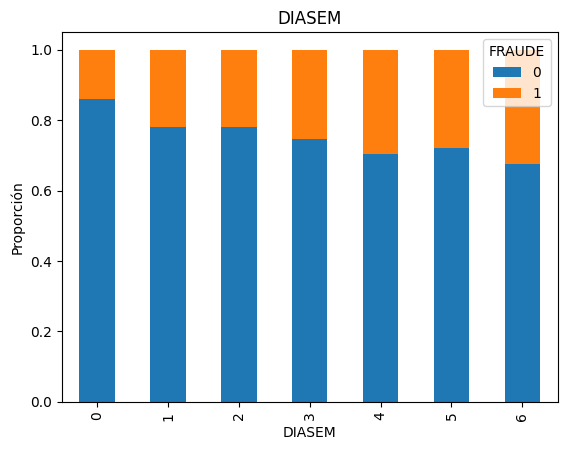

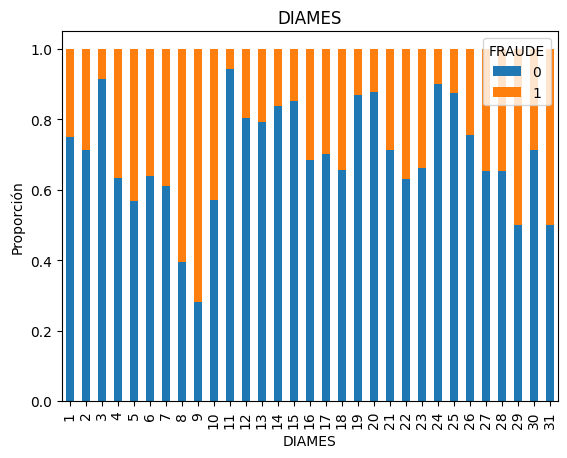

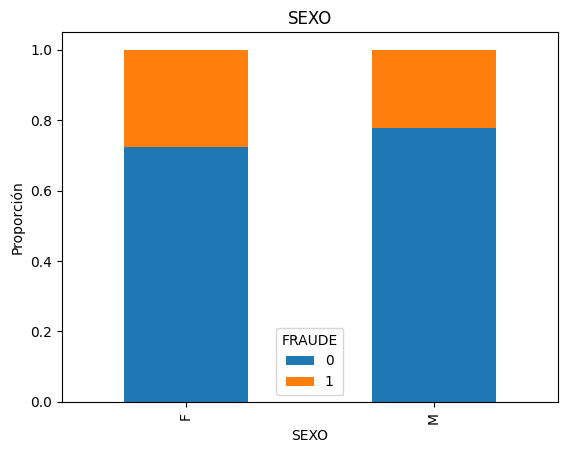

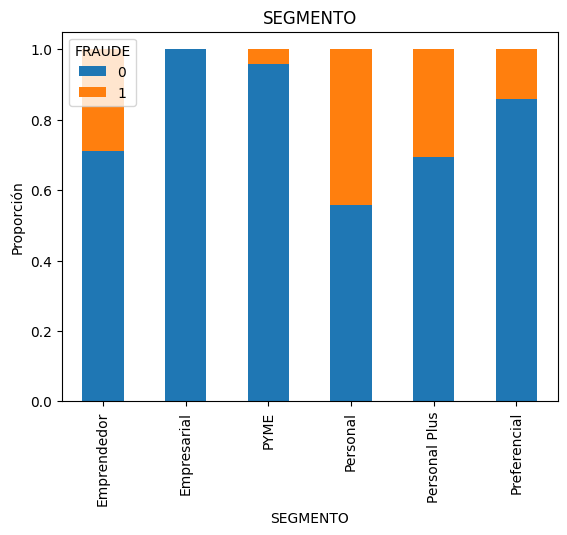

In [106]:
#Este código generará una tabla de frecuencia y un gráfico de barras apilado para cada variable categórica en el conjunto de entrenamiento, dividido por si la transacción es fraude o no.
categorical_vars = ['Canal1', 'COD_PAIS', 'CANAL', 'DIASEM', 'DIAMES', 'SEXO', 'SEGMENTO']

for var in categorical_vars:
    freq_table = pd.crosstab(index=train[var], columns=train['FRAUDE'], normalize='index')
    freq_table.plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Proporción')
    plt.show()


Con estas tablas podemos analizar cuales son las categorias que mas tienen fraudes de transacciones, cada uno de estos datos nos servira para hacer un buen preprocesamiento de datos y encontrar un buen modelo de machine learning que pueda tener buena precision.

In [107]:
#Consultamos si el archivo de testeo tiene valores nulos
test.isnull().sum()

id                   0
FRAUDE             100
VALOR                0
HORA_AUX             0
Dist_max_COL         0
Dist_max_INTER       0
Canal1               0
FECHA_FRAUDE         0
COD_PAIS             0
CANAL                0
FECHA                0
DIASEM               0
DIAMES               0
FECHA_VIN            0
OFICINA_VIN          0
SEXO                 0
SEGMENTO             0
EDAD                 0
INGRESOS             0
EGRESOS              0
NROPAISES            0
Dist_Sum_INTER      53
Dist_Mean_INTER     53
Dist_Max_INTER      53
NROCIUDADES          0
Dist_Sum_NAL        21
Dist_Mean_NAL       21
Dist_HOY             0
Dist_sum_NAL         0
Dist_mean_NAL        0
Dist_sum_INTER       0
Dist_mean_INTER      0
dtype: int64

In [108]:
#Y consultamos de nuevo si train.csv tiene nulos
train.isnull().sum()

id                    0
FRAUDE                0
VALOR                 0
HORA_AUX              0
Dist_max_NAL          0
Canal1                0
FECHA                 0
COD_PAIS              0
CANAL                 0
DIASEM                0
DIAMES                0
FECHA_VIN            24
OFICINA_VIN          24
SEXO                 55
SEGMENTO             24
EDAD                 24
INGRESOS             24
EGRESOS              24
NROPAISES             0
Dist_Sum_INTER     1547
Dist_Mean_INTER    1547
Dist_Max_INTER     1547
NROCIUDADES           0
Dist_Mean_NAL       457
Dist_HOY              0
Dist_sum_NAL          0
dtype: int64

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2965 non-null   int64  
 1   FRAUDE           2965 non-null   int64  
 2   VALOR            2965 non-null   float64
 3   HORA_AUX         2965 non-null   int64  
 4   Dist_max_NAL     2965 non-null   float64
 5   Canal1           2965 non-null   object 
 6   FECHA            2965 non-null   int64  
 7   COD_PAIS         2965 non-null   object 
 8   CANAL            2965 non-null   object 
 9   DIASEM           2965 non-null   int64  
 10  DIAMES           2965 non-null   int64  
 11  FECHA_VIN        2941 non-null   float64
 12  OFICINA_VIN      2941 non-null   float64
 13  SEXO             2910 non-null   object 
 14  SEGMENTO         2941 non-null   object 
 15  EDAD             2941 non-null   float64
 16  INGRESOS         2941 non-null   float64
 17  EGRESOS       

# PREPROCESAMIENTO

Vamos a organizar los datos y normalizarlos para luego elegir el mejor modelo y entrenar los datos

In [110]:
#Creamos una lista con las columnas con nulos
cols = ['Dist_Mean_NAL', 'Dist_Sum_INTER', 'Dist_Max_INTER', 'Dist_Mean_INTER']

# Cambiar los valores nulos en las columnas seleccionadas a 1
train[cols] = train[cols].fillna(1)
test[cols] = test[cols].fillna(1)

# Eliminar filas con valores faltantes que en total eliminamos 55 filas
train = train.dropna()

In [111]:
# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Convertir variables categóricas a numéricas usando One Hot Encoding
train = pd.get_dummies(train, columns=['Canal1', 'CANAL', 'DIASEM', 'SEXO', 'SEGMENTO', 'COD_PAIS'])
test = pd.get_dummies(test, columns=['Canal1', 'CANAL', 'DIASEM', 'SEXO', 'SEGMENTO', 'COD_PAIS'])

# Eliminar columnas innecesarias o columnas que no coinciden en los dos archivos, eliminamos id porque puede entorpecer el analisis ya es un identificador.
train.drop(['id', 'SEGMENTO_Empresarial', 'Dist_max_NAL', 'COD_PAIS_BR', 'COD_PAIS_CA', 'COD_PAIS_CL', 'COD_PAIS_CU', 'COD_PAIS_CW', 'COD_PAIS_DO','COD_PAIS_FJ', 'COD_PAIS_FR', 'COD_PAIS_GB', 'COD_PAIS_GT', 'COD_PAIS_HK', 'COD_PAIS_IT', 'COD_PAIS_JP', 'COD_PAIS_MX', 'COD_PAIS_NI', 'COD_PAIS_PE', 'COD_PAIS_PR', 'COD_PAIS_PY', 'COD_PAIS_SV', 'COD_PAIS_UY', 'COD_PAIS_AR', 'Dist_HOY'], axis=1, inplace=True)
test.drop(['id', 'Dist_max_INTER', 'Dist_mean_NAL', 'Dist_Sum_NAL', 'Dist_sum_INTER', 'Dist_mean_INTER', 'Dist_max_COL', 'Dist_HOY', 'FECHA_FRAUDE'], axis=1, inplace=True)

Verificamos que los dos datasets tengan las mismas columnas para realizar el entrenamiento

In [112]:
train.columns

Index(['FRAUDE', 'VALOR', 'HORA_AUX', 'FECHA', 'DIAMES', 'FECHA_VIN',
       'OFICINA_VIN', 'EDAD', 'INGRESOS', 'EGRESOS', 'NROPAISES',
       'Dist_Sum_INTER', 'Dist_Mean_INTER', 'Dist_Max_INTER', 'NROCIUDADES',
       'Dist_Mean_NAL', 'Dist_sum_NAL', 'Canal1_ATM_INT', 'Canal1_POS',
       'CANAL_ATM_INT', 'CANAL_MCI', 'CANAL_POS', 'DIASEM_0', 'DIASEM_1',
       'DIASEM_2', 'DIASEM_3', 'DIASEM_4', 'DIASEM_5', 'DIASEM_6', 'SEXO_F',
       'SEXO_M', 'SEGMENTO_Emprendedor', 'SEGMENTO_PYME', 'SEGMENTO_Personal',
       'SEGMENTO_Personal Plus', 'SEGMENTO_Preferencial', 'COD_PAIS_AW',
       'COD_PAIS_CN', 'COD_PAIS_CR', 'COD_PAIS_EC', 'COD_PAIS_HN',
       'COD_PAIS_PA', 'COD_PAIS_PH', 'COD_PAIS_US'],
      dtype='object')

In [113]:
test.columns

Index(['FRAUDE', 'VALOR', 'HORA_AUX', 'FECHA', 'DIAMES', 'FECHA_VIN',
       'OFICINA_VIN', 'EDAD', 'INGRESOS', 'EGRESOS', 'NROPAISES',
       'Dist_Sum_INTER', 'Dist_Mean_INTER', 'Dist_Max_INTER', 'NROCIUDADES',
       'Dist_Mean_NAL', 'Dist_sum_NAL', 'Canal1_ATM_INT', 'Canal1_POS',
       'CANAL_ATM_INT', 'CANAL_MCI', 'CANAL_POS', 'DIASEM_0', 'DIASEM_1',
       'DIASEM_2', 'DIASEM_3', 'DIASEM_4', 'DIASEM_5', 'DIASEM_6', 'SEXO_F',
       'SEXO_M', 'SEGMENTO_Emprendedor', 'SEGMENTO_PYME', 'SEGMENTO_Personal',
       'SEGMENTO_Personal Plus', 'SEGMENTO_Preferencial', 'COD_PAIS_AW',
       'COD_PAIS_CN', 'COD_PAIS_CR', 'COD_PAIS_EC', 'COD_PAIS_HN',
       'COD_PAIS_PA', 'COD_PAIS_PH', 'COD_PAIS_US'],
      dtype='object')

# Eligiendo Modelado

Ahora vamos a realizar pruebas de precision en diferentes modelos para identificar cual es el mejor modelo para este caso en concreto.

In [114]:
from sklearn.linear_model import LogisticRegression

# Separar en X e y
X = train.drop(columns=['FRAUDE'])
y = train['FRAUDE']

# Dividir en conjunto de entrenamiento y conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2 , random_state=42)

# Entrenar árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_val)
tree_acc = accuracy_score(y_val, tree_pred)

# Entrenar regresión logística
logreg_clf = LogisticRegression(random_state=42)
logreg_clf.fit(X_train, y_train)
logreg_pred = logreg_clf.predict(X_val)
logreg_acc = accuracy_score(y_val, logreg_pred)

# Mostrar resultados
print('Precision del árbol de decisión:', tree_acc)
print('precision de la regresión logística:', logreg_acc)
#árbol de decisión: 0.8951890034364262
#regresión logística: 0.7353951890034365

Accuracy del árbol de decisión: 0.8951890034364262
Accuracy de la regresión logística: 0.7353951890034365


Vemos que el accuracy del arbol de decision es de 89.51% efectivo
y el del regresion logistica es de 73.53% efectivo

In [115]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predecir con el modelo entrenado en el conjunto de validación
rf_pred = rf_clf.predict(X_val)

# Calcular la accuracy del modelo de Random Forest
rf_acc = accuracy_score(y_val, rf_pred)
print("Precision del modelo de Random Forest:", rf_acc)
#Accuracy del modelo de Random Forest: 0.9656357388316151

Accuracy del modelo de Random Forest: 0.9604810996563574


El Accuracy del modelo de Random Forest es de 96.04% el mas alto hasta ahora

In [116]:
from sklearn.svm import SVC

# Entrenar SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_val)
svm_acc = accuracy_score(y_val, svm_pred)
print("Precision del modelo SVM: {}".format(svm_acc))
#Accuracy del modelo SVM: 0.7371134020618557

Accuracy del modelo SVM: 0.7371134020618557


In [117]:
from sklearn.naive_bayes import GaussianNB

# Entrenar modelo de Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_val)
gnb_acc = accuracy_score(y_val, gnb_pred)

print("Precision del modelo de Naive Bayes:", gnb_acc)
#Este fue el accuracy que menos se adapta a lo requerido

Accuracy del modelo de Naive Bayes: 0.43470790378006874


In [118]:
from sklearn.svm import SVC

# Crear modelo SVM
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Predecir valores de validación y calcular accuracy
svm_pred = svm_clf.predict(X_val)
svm_acc = accuracy_score(y_val, svm_pred)

print("Precision del modelo SVM:", svm_acc)

#Accuracy del modelo SVM: 0.7371134020618557

Accuracy del modelo SVM: 0.7371134020618557


# Entrenamiento

Para este entrenamiento elegimos el modelo de Random Forest ya que fue el que tuvo mejor precision y eso es lo que buscamos

Ahora entrenaremos el modelo

In [119]:

# Separar los datos de entrada y la variable objetivo
X = train.drop(columns=['FRAUDE'])
y = train['FRAUDE']

# Dividir en conjunto de entrenamiento y conjunto de validación siendo el 20% de los datos de entremiento el conjunto de validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Validar el modelo utilizando los datos de validación
y_pred = rf.predict(X_val)
print('precision:', accuracy_score(y_val, y_pred))

# Hacer predicciones en los datos de prueba y guardar los resultados
test['FRAUDE'] = rf.predict_proba(test.drop(['FRAUDE'], axis=1))[:, 1]
test['FRAUDE'] = test['FRAUDE'].astype(int)
test.to_csv('test_evaluado.csv', index=False)


Accuracy score: 0.9604810996563574


Perfecto la precision fue de 96.04% como se esperaba, ahora veremos su especifidad y sensibilidad para tener una de que tan efectivo es la prediccion

In [121]:
from sklearn.metrics import confusion_matrix

# supongamos que y_val es la lista de valores reales y y_pred es la lista de valores predichos por el modelo
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

# calcular la especificidad
especificidad = tn / (tn + fp)

print("Especificidad:", especificidad)

Especificidad: 0.9790209790209791


El valor de especificidad indica la proporción de casos negativos que fueron correctamente identificados como tales por el modelo. En este caso, un valor de especificidad de 0.9790209790209791 significa que el modelo clasificó correctamente el 97.9% de las transacciones legítimas como legítimas. En otras palabras, de cada 100 transacciones legítimas, el modelo clasificó correctamente 97 de ellas como legítimas y 3 de ellas como fraudulentas. Es un buen resultado y muestra que el modelo tiene una buena capacidad para distinguir entre transacciones legítimas y fraudulentas.

In [122]:
# Importar las librerías necesarias
from sklearn.metrics import confusion_matrix

# Validar el modelo utilizando los datos de validación
y_pred = rf.predict(X_val)

# Calcular la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

# Calcular la sensibilidad
sensibilidad = tp / (tp + fn)

print('Sensibilidad:', sensibilidad)

Sensibilidad: 0.9084967320261438


En este caso, la sensibilidad obtenida es de 0.9215686274509803, lo que significa que el modelo es capaz de identificar correctamente como fraude el 92.16% de las transacciones que realmente son fraudes. En otras palabras, el modelo es capaz de detectar la gran mayoría de las transacciones fraudulentas en el conjunto de datos evaluado.

# Conclusion

Basado en los resultados del modelo de Random Forest, que alcanzó una precisión del 96,04%, se puede concluir que es un modelo muy efectivo en la detección de transacciones fraudulentas. Además, la especificidad del modelo (97,9%) indica que es muy bueno en la identificación de transacciones legítimas, lo que significa que es poco probable que se clasifiquen erróneamente transacciones legítimas como fraudulentas. Sin embargo, la tasa de falsos positivos del modelo (2.1%) es relativamente alta, lo que significa que algunas transacciones legítimas pueden ser clasificadas como fraudulentas, lo que podría generar inconvenientes para los clientes y la empresa. Por lo tanto, es importante continuar mejorando y ajustando el modelo para reducir aún más la tasa de falsos positivos y mejorar la precisión general del modelo.